In [1]:
import numpy as np
import matplotlib.pyplot as plt
from method.Optimizer import Optimizer

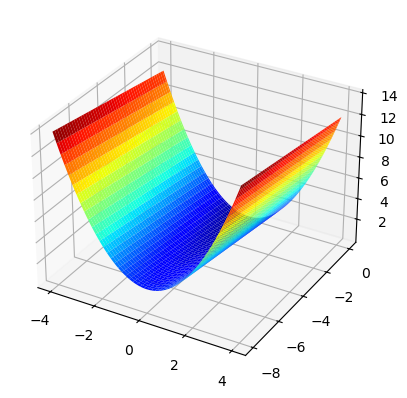

In [2]:
def objective(x: list) -> float:
    """
    Define objective function
    :param x: Coordinates of points
    :return: Loss value of objective function
    """
    return 0.75 * x[0] ** 2 - 0.25 * x[1]

def derivative(x: list) -> np.ndarray:
    """
    Define derivative of objective function
    :param x: Coordinates of points
    :return: The partial derivatives of the objective function at the point with respect to each parameter
    """
    return np.asarray(
        [1.5 * x[0],
         -0.25])

# Uniformly generate meshes
x_coord = np.linspace(-4, 4, 100)
y_coord = np.linspace(-8, 0, 100)
x_coord, y_coord = np.meshgrid(x_coord, y_coord)
# Calculate the value of the corresponding loss
z_coord = objective([x_coord, y_coord])
# Creating a Canvas
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
# Drawing 3D graphs of loss space
ax1.plot_surface(x_coord, y_coord, z_coord, cmap='jet')

plt.show()

In [3]:
# Define learning rate and its decay factor
alpha, gamma = 1.3, 1
# Setting the hyperparameter betas
beta_1, beta_2, beta_3 = 0.7, 0.5, 0.5
# Initialise the optimiser
optimizer = Optimizer(objective=objective, derivative=derivative, steps=20, start_point=[3.5, -8])
# Training by SGD
track_list_sgd, loss_val_list_sgd = optimizer.sgd(alpha=alpha, gamma=gamma)
track_list_sgd = np.asarray(track_list_sgd)
# Training by momentum
track_list_momentum, loss_val_list_momentum = optimizer.momentum(alpha=alpha, gamma=gamma, beta_1=beta_1)
track_list_momentum = np.asarray(track_list_momentum)
# Training by RMSprop
track_list_rmsprop, loss_val_list_rmsprop = optimizer.rmsprop(alpha=alpha, gamma=gamma, beta_2=beta_2)
track_list_rmsprop = np.asarray(track_list_rmsprop)
# Training by adam
track_list_adam, loss_val_list_adam = optimizer.adam(alpha=alpha, gamma=gamma, beta_1=beta_1, beta_2=beta_2)
track_list_adam = np.asarray(track_list_adam)
# Training by signum
track_list_signum, loss_val_list_signum = optimizer.signum(alpha=alpha, gamma=gamma, beta_1=beta_1)
track_list_signum = np.asarray(track_list_signum)
# Training by lion
track_list_lion, loss_val_list_lion = optimizer.lion(alpha=alpha, gamma=gamma, beta_1=beta_1, beta_3=beta_3)
track_list_lion = np.asarray(track_list_lion)

Training
SGD step: 0  point:[3.5, -8]  loss:11.1875
SGD step: 1  point:[-3.325, -7.675]  loss:10.21046875
SGD step: 2  point:[3.1587500000000013, -7.35]  loss:9.320776171875007
SGD step: 3  point:[-3.000812500000001, -7.0249999999999995]  loss:8.509906745117192
SGD step: 4  point:[2.8507718750000004, -6.699999999999999]  loss:7.7701752124682635
SGD step: 5  point:[-2.708233281250001, -6.374999999999999]  loss:7.094645629252611
SGD step: 6  point:[2.5728216171875014, -6.049999999999999]  loss:6.477058305400481
SGD step: 7  point:[-2.444180536328126, -5.724999999999999]  loss:5.911763870623934
SGD step: 8  point:[2.3219715095117204, -5.399999999999999]  loss:5.393663768238103
SGD step: 9  point:[-2.205872934036135, -5.074999999999998]  loss:4.9181565508348895
SGD step: 10  point:[2.0955792873343286, -4.749999999999998]  loss:4.4810894121284885
SGD step: 11  point:[-1.9908003229676128, -4.424999999999998]  loss:4.078714444445962
SGD step: 12  point:[1.8912603068192322, -4.099999999999998]

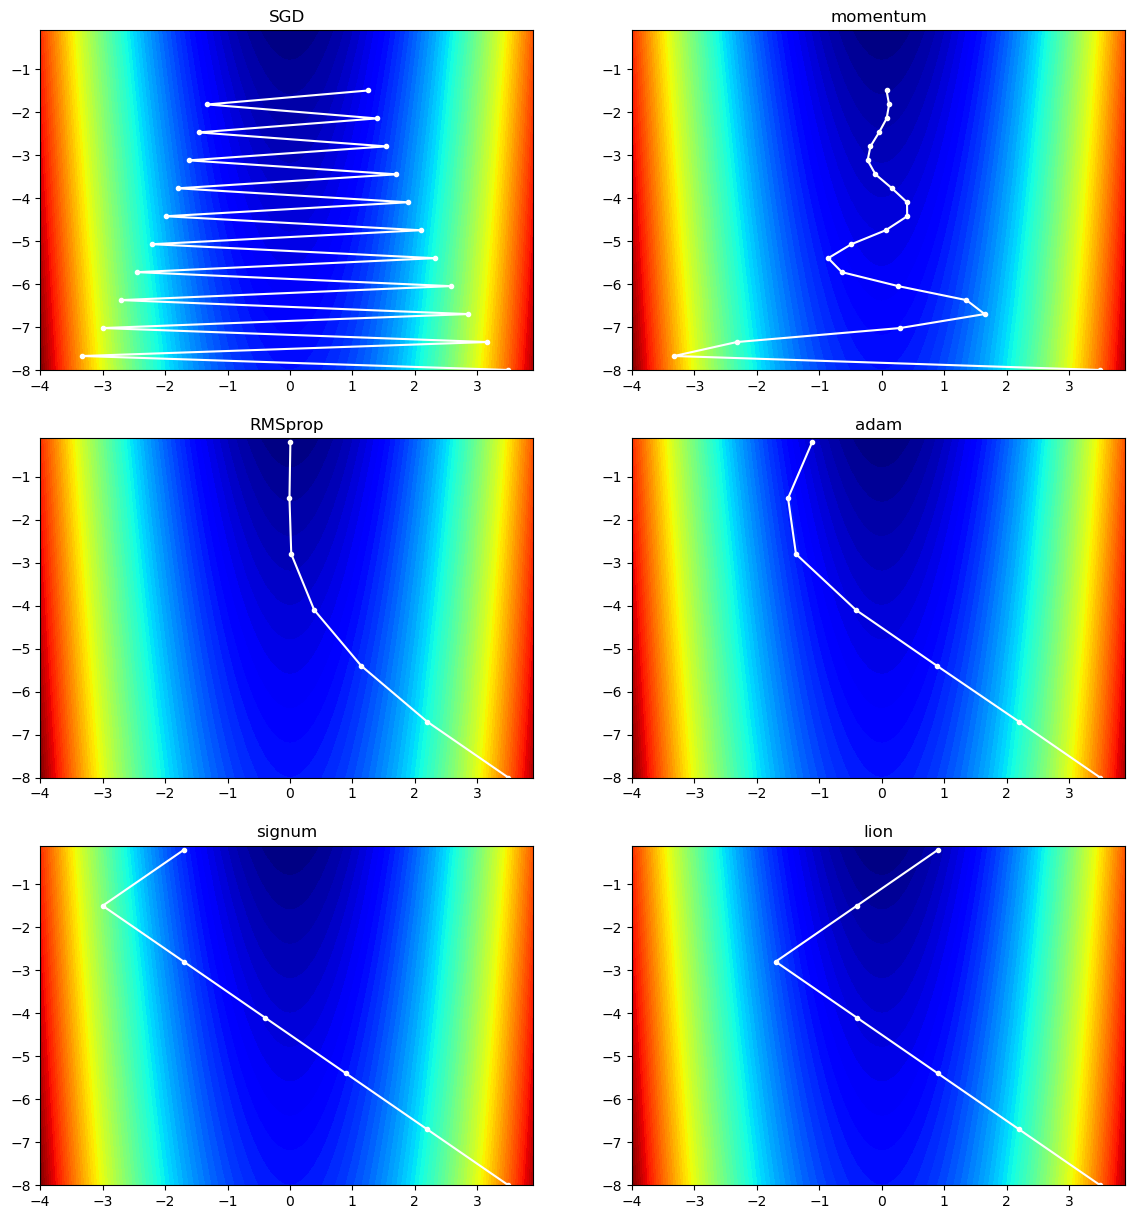

In [4]:
# Uniformly generate meshes
x_axis = np.arange(-4, 4, 0.1)
y_axis = np.arange(-8, 0, 0.1)
grid_x, grid_y = np.meshgrid(x_axis, y_axis)
# Calculate the value of the corresponding loss
results = objective([grid_x, grid_y])
# Creating a Canvas
fig = plt.figure(figsize=(14, 15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
# Plot the decline curve of SGD
ax1.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax1.plot(track_list_sgd[:, 0], track_list_sgd[:, 1], '.-', color='w')
ax1.set_title('SGD')
# Plot the decline curve of momentum
ax2.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax2.plot(track_list_momentum[:, 0], track_list_momentum[:, 1], '.-', color='w')
ax2.set_title('momentum')
# Filter data outside the display range
rows_in_range = track_list_rmsprop[:, 1] <= 0
filtered_track_list_rmsprop = track_list_rmsprop[rows_in_range]
# Plot the decline curve of RMSprop
ax3.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax3.plot(filtered_track_list_rmsprop[:, 0], filtered_track_list_rmsprop[:, 1], '.-', color='w')
ax3.set_title('RMSprop')
# Filter data outside the display range
rows_in_range = track_list_adam[:, 1] <= 0
filtered_track_list_adam = track_list_adam[rows_in_range]
# Plot the decline curve of adam
ax4.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax4.plot(filtered_track_list_adam[:, 0], filtered_track_list_adam[:, 1], '.-', color='w')
ax4.set_title('adam')

# Filter data outside the display range
rows_in_range = track_list_signum[:, 1] <= 0
filtered_track_list_signum = track_list_signum[rows_in_range]
# Plot the decline curve of RMSprop
ax5.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax5.plot(filtered_track_list_signum[:, 0], filtered_track_list_signum[:, 1], '.-', color='w')
ax5.set_title('signum')
# Filter data outside the display range
rows_in_range = track_list_lion[:, 1] <= 0
filtered_track_list_lion = track_list_lion[rows_in_range]
# Plot the decline curve of adam
ax6.contourf(grid_x, grid_y, results, levels=80, cmap='jet')
ax6.plot(filtered_track_list_lion[:, 0], filtered_track_list_lion[:, 1], '.-', color='w')
ax6.set_title('lion')

plt.show()